In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from vega_datasets import data

In [202]:
df = data.sf_temps()
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [206]:
df.date = pd.to_datetime(df.date, format='%Y-%m-%d %I-%p')
df = df.set_index('date')

In [207]:
df_mean = df.resample('D').mean()
df_mean.head()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667


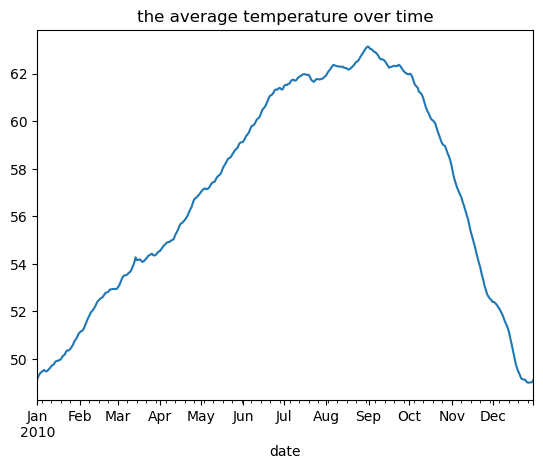

In [208]:
df_mean.temp.plot()

plt.title('the average temperature over time')
plt.show()

2. Write the code necessary to visualize the minimum temperature over time.

In [209]:
df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


In [210]:
df_min = df.resample('d').min()

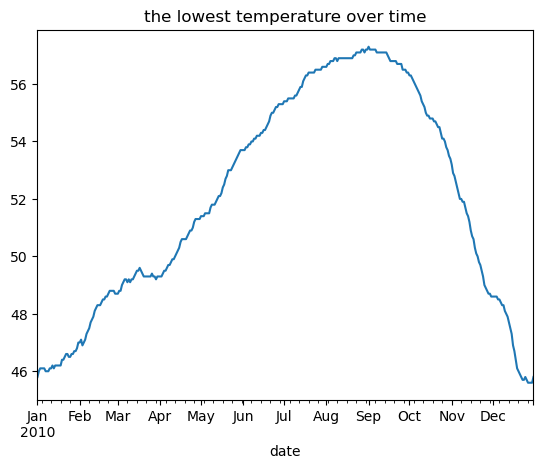

In [211]:
df_min.temp.plot()

plt.title('the lowest temperature over time')
plt.show()

3. Write the code necessary to visualize the maximum temperature over time.

In [212]:
df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


In [213]:
df_max = df.resample('d').max()
df_max.head()

,temp
date,
2010-01-01,53.3
2010-01-02,53.4
2010-01-03,53.5
2010-01-04,53.6
2010-01-05,53.8


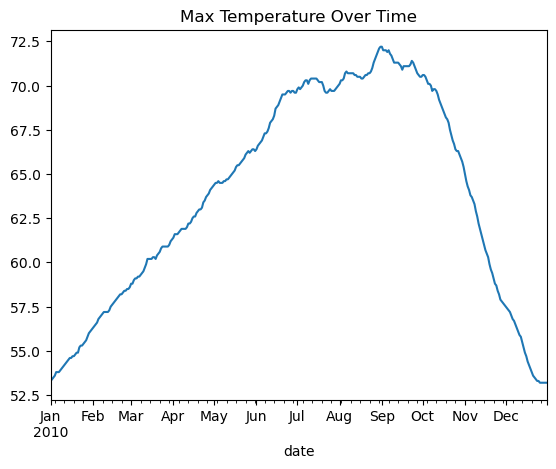

In [214]:
df_max.temp.plot()
plt.title('Max Temperature Over Time')
plt.show()

4. Which month is the coldest, on average?

In [215]:
df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


In [216]:
# create month columns
cold_month = df.resample('M').mean()
cold_month.idxmin()

temp   2010-01-31
dtype: datetime64[ns]

5. Which month has the highest average temperature?

In [217]:
hot_month = df.resample('M').mean()
hot_month.max()

temp    62.487083
dtype: float64

6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [219]:
mm_df = df.resample('D').agg(['min', 'max'])
mm_df.head()

temp      
             min   max
date                  
2010-12-27  45.6  53.2
2010-12-28  45.6  53.2
2010-12-29  45.6  53.2
2010-12-30  45.6  53.2
2010-12-31  45.8  53.2

In [137]:
mm_df['temperature_change'] = mm_df['temp']['max'] - mm_df['temp']['min']
mm_df.head()

temp       temperature_change
             min   max                   
date                                     
2010-01-01  45.8  53.3                7.5
2010-01-02  46.0  53.4                7.4
2010-01-03  46.1  53.5                7.4
2010-01-04  46.1  53.6                7.5
2010-01-05  46.1  53.8                7.7

In [138]:
mm_df.temperature_change.idxmax()

Timestamp('2010-08-31 00:00:00', freq='D')

7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

In [141]:
mmm_df = df.resample('D').agg(['min', 'mean', 'max'])

/usr/local/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1244: UserWarning: Attempting to set identical left == right == 40.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


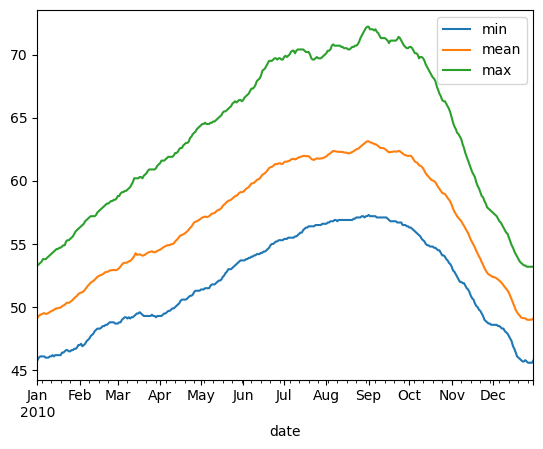

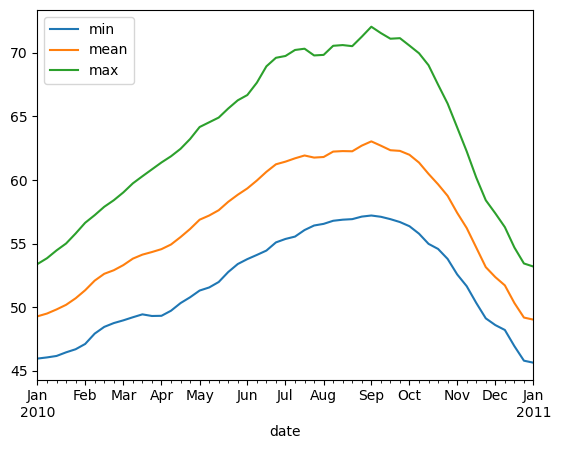

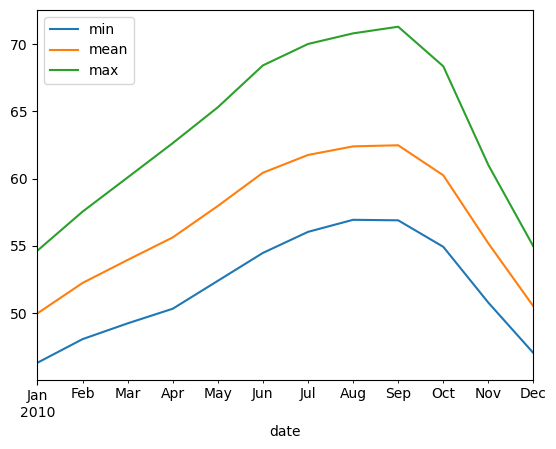

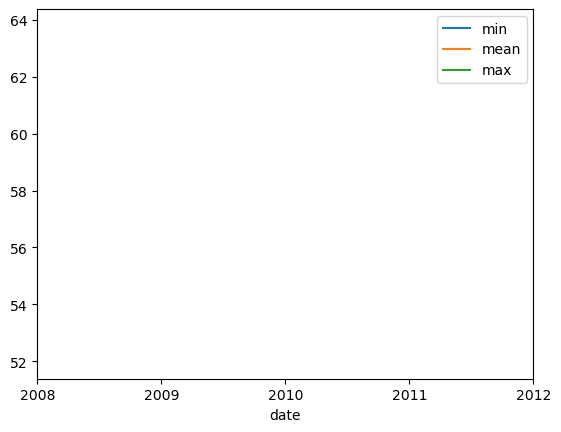

In [222]:

mmm_df.temp.plot(label='daily')
mmm_df.resample('W').mean().temp.plot(label='weekly')
mmm_df.resample('M').mean().temp.plot(label='monthly')
mmm_df.resample('Y').mean().temp.plot(label='yearly')

plt.legend();

1. Which year and month combination has the highest amount of precipitation?

In [225]:
df = data.seattle_weather()
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [226]:
df = df.set_index('date')
df = df.sort_index()

In [228]:
df.resample('M').sum().precipitation.idxmax()

Timestamp('2015-12-31 00:00:00', freq='M')

2. Visualize the amount of monthly precipitation over time.

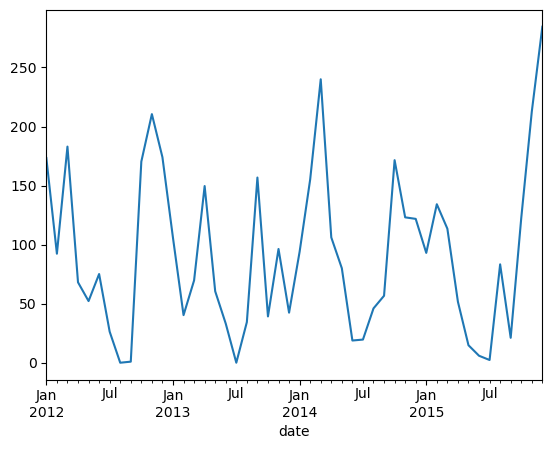

In [231]:
df.resample('M').sum().precipitation.plot();

3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.


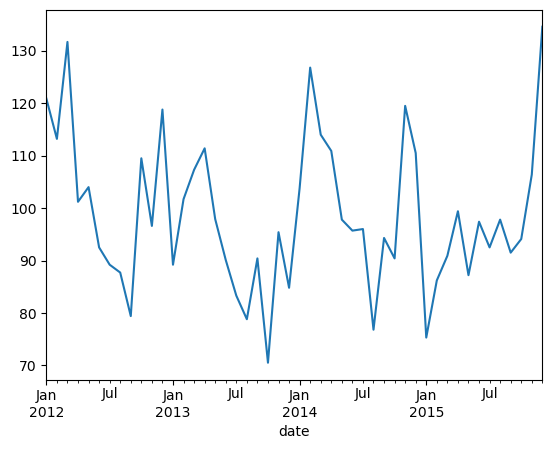

In [233]:
df.resample('M').sum().wind.plot();

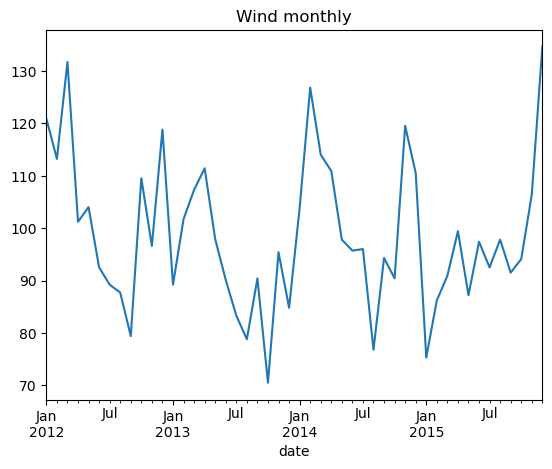

In [234]:
df.resample('M').sum().wind.plot(label='monthly')
plt.title('Wind monthly')
plt.show()

4. Which year-month combination is the windiest?

In [236]:
df.resample('M').sum().wind.sort_values(ascending=False).head(1)

date
2015-12-31    134.6
Name: wind, dtype: float64

5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [239]:
df[df.weather=="sun"].index.year.value_counts()

2014    211
2013    205
2015    180
2012    118
Name: date, dtype: int64

In [182]:
sun_subset = df[df.weather=="sun"]

In [241]:
sun_subset.resample('Y').count().weather.idxmax()

Timestamp('2014-12-31 00:00:00', freq='A-DEC')

6. In which month does it rain the most?

In [242]:
df.weather.value_counts()

sun        714
fog        411
rain       259
drizzle     54
snow        23
Name: weather, dtype: int64

In [247]:
df.groupby(df.index.month_name()).sum().precipitation.max()

642.5

7. Which month has the most number of days with a non-zero amount of precipitation?

In [250]:
df['month'] = df.index.month_name()

In [254]:
df[df.precipitation > 0].groupby('month').count().weather.sort_values()

month
July         11
August       22
May          34
September    35
June         37
April        59
October      61
January      66
November     71
February     73
March        73
December     81
Name: weather, dtype: int64

In [256]:
df = data.flights_20k()

In [257]:
df.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         20000 non-null  datetime64[ns]
 1   delay        20000 non-null  int64         
 2   distance     20000 non-null  int64         
 3   origin       20000 non-null  object        
 4   destination  20000 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 781.4+ KB


1. Which year and month combination has the highest amount of precipitation?

In [261]:
df = df.set_index('date')
df = df.sort_index()

In [262]:
df.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,-8,251,MDW,STL
2001-01-01 07:00:00,-10,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


In [264]:
df.delay = np.where(df.delay < 0, 0, df.delay)

In [265]:
df.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,0,251,MDW,STL
2001-01-01 07:00:00,0,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


2. Which hour of the day has the highest average delay?

In [276]:
df['hour'] = df.index.hour

In [277]:
df.groupby('hour').mean().delay.sort_values().tail(1)

hour
3    302.5
Name: delay, dtype: float64

3. Does the day of the week make a difference in the delay amount?

In [278]:
df['weekday'] = df.index.dayofweek

In [279]:
df.head()

,delay,distance,origin,destination,hour,weekday,month
date,,,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,0,0,January
2001-01-01 06:20:00,0,491,BNA,MCI,6,0,January
2001-01-01 06:30:00,0,251,MDW,STL,6,0,January
2001-01-01 07:00:00,0,361,OAK,ONT,7,0,January
2001-01-01 07:00:00,0,303,MSY,HOU,7,0,January


In [280]:
df.groupby('weekday').mean().delay.sort_values()

weekday
0     7.165772
5     8.431498
1     9.410866
6    10.413542
2    11.032478
3    12.821322
4    17.757596
Name: delay, dtype: float64

4. Does the month make a difference in the delay amount?

In [281]:
df['month'] = df.index.month_name()

In [282]:
df.groupby('month').mean().delay

month
February    12.306106
January     11.301592
March        9.875287
Name: delay, dtype: float64